# **Project Name**    -    Amazon Prime Video Exploratory Data Analysis (EDA)



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project deals with the Exploratory Data Analysis (EDA) of Amazon Prime Video (A streaming plateform) dataset allowing us to extract valueable insights, such as Content diversity, Regional Availability, Trends Over Time and IMDb Ratings.

This project uncovers key trends that influence, subscription growth, user engagement, and content investment strategies in streaming industry for bussiness, content creators and Data Analyst.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**We are required to extract valuable insights from Amazon Prime Video Dataset, that is**

**1. Content Diversity: What genres and categories dominate the plateform.?**

**2. Regional Availability: How does content distribution vary across different regions?**

**3. Trends Over Time: How has Amazon Prime's content library evolved?**

**4. IMDb Ratings and Popularity: What are the highest rated or most popular shows on plateform?**

#### **Define Your Business Objective?**

The bussiness objective of this project is to find,
- Key Trends
- Subscription Growth
- User Engagement
- Content Investment Strategies

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [51]:
# Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import ast

### Dataset Loading

In [52]:
# Load Dataset
title = pd.read_csv("titles.csv")

### Dataset First View

In [53]:
# Dataset First Look
title.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count
print(f"Rows and Columns count for titles {title.shape}")

Rows and Columns count for titles (9871, 15)


### Dataset Information

In [55]:
# Dataset Info
print(title.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
print(f"Duplicated value count for title \n{title.duplicated().sum()}")

Duplicated value count for title 
3


#### Missing Values/Null Values

In [57]:
# Missing Values/Null Values Count
title.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [58]:
# Missing value percentage calculation
def missing_percent(df):
    missing_values = df.isnull().sum()
    df_length = len(df)
    missing_percent = (missing_values/df_length)*100
    return missing_percent.sort_values(ascending = False)

In [59]:
missing_percent(title)

seasons                 86.252659
age_certification       65.717759
tmdb_score              21.092088
imdb_votes              10.444737
imdb_score              10.343430
imdb_id                  6.757167
tmdb_popularity          5.541485
description              1.205552
runtime                  0.000000
title                    0.000000
type                     0.000000
id                       0.000000
release_year             0.000000
genres                   0.000000
production_countries     0.000000
dtype: float64

<Axes: >

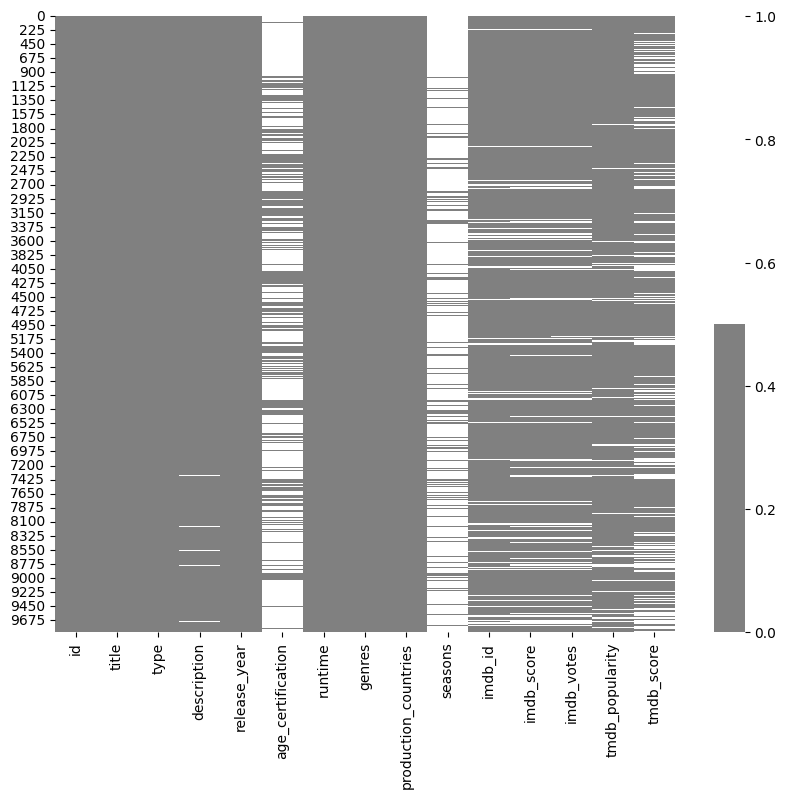

In [60]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
colors = ['grey','white']
sns.heatmap(title.isna(),cmap = sns.color_palette(colors))

### What did you know about your dataset?

- The title dataset has 9871 rows with 15 columns containing information about Amazon Prime Plateform.
- There are 3 duplicated rows. with
  (86% missing value in season column)
  (65% missing value in age_certification column)
  (21% missing value in tmdb_score column)
  (10% missing value in imdb_votes column)
  (10% missing value in imdb_scores column)
  (6% missing value in imdb_id column)
  (5% missing value in tmdb_popularity column)
  (1% missing value in description column)

## ***2. Understanding Your Variables***

In [61]:
# Dataset Columns
print(f"Columns for title \n{title.columns}")

Columns for title 
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [62]:
# Dataset Describe
print(f"Data description for title \n{title.describe()}")

Data description for title 
       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%           5.63400

### Variables Description

- 'id' contains the content id that is unique for each content.
- 'title' contains the movie/show name
- 'type' contains the type of content, weather it's a movie or show
- 'description' contains short description of the movie.
- 'release_year' contains the year in which the movie/show was released.
- 'runtime' contains length of movies/show in minutes.
- 'genres' contains genre type for each movie/show, may contain multiple genre for single content.
- 'production_countries' contains list of countries where content was re;eased.
- 'imdb_score' contains imdb_score for each content (1 to 10)
- 'imdb_votes' contains popularity based on imdb (higher votes more popularity)

### Check Unique Values for each variable.

In [63]:
# Check Unique Values for each variable.\
print(f"Unique values for title \n{title.nunique()}")

Unique values for title 
id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [64]:
# Write your code to make your dataset analysis ready.

We will first drop the duplicated rows in dataset

In [65]:
# Removing duplicated values in titles
title.drop_duplicates(keep = 'first',inplace = True)
title.reset_index(drop = 'True',inplace = True)

We will calculate missing value percentage in each column for title dataset.

In [66]:
# Calculating missing values for title DataFrame
missing_percent(title)

seasons                 86.248480
age_certification       65.707337
tmdb_score              21.078233
imdb_votes              10.447912
imdb_score              10.346575
imdb_id                  6.759222
tmdb_popularity          5.543170
description              1.205918
runtime                  0.000000
title                    0.000000
type                     0.000000
id                       0.000000
release_year             0.000000
genres                   0.000000
production_countries     0.000000
dtype: float64

age_certifications and seasons has significant missing values. Dropping this column is the preffered.

In [67]:
# Dropping columns age_certification and seasons
title.drop(columns = ['age_certification','seasons'],axis = 1,inplace = True)

In [68]:
title.isna().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
runtime                    0
genres                     0
production_countries       0
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2080
dtype: int64

Some of our values in description and imdb_id in title dataset are missing. We will replace it with "Not Avalibale".

In [69]:
# Filling NA's in description and imdb_id with Not Available
title['description'] = title['description'].fillna('Not Available',axis=0)
title['imdb_id'] = title['imdb_id'].fillna('Not Available',axis = 0)

In [70]:
# Function for calculating group-wise mode.
def fill_mode(dataset,col):
    result = dataset[col].fillna(dataset.groupby('type')[col].transform(lambda x: x.mode().iloc[0]))
    return result

"imdb_score","imdb_votes","tmdb_popularity",and "tmdb_score" have some null values. We will replace them with mode their column data.

In [71]:
# Filing missing values in imdb_score,imdb_votes,tmdb_popularity and tmdb_score based on type
title['imdb_score'] = fill_mode(title,'imdb_score')
title['imdb_votes'] = fill_mode(title,'imdb_votes')
title['tmdb_popularity'] = fill_mode(title,'tmdb_popularity')
title['tmdb_score'] = fill_mode(title,'tmdb_score')

In [72]:
title.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

The 'genres' and 'production_countries' column are in the format like list. Although there seems to be no null values in these columns, they may be hidden in the form like '[]'.

In [73]:
title[(title['genres'] == '[]') | (title['genres'].isna()) | (title['production_countries'] == '[]') | (title['production_countries'].isna())].head(5)

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,56,[],[],Not Available,6.0,11.0,0.600,6.0
379,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,1945,21,[],[],Not Available,6.0,11.0,0.600,8.0
382,tm83465,Sunny,MOVIE,Sunny is a 1941 film American film directed by...,1941,98,[],['US'],tt0034243,5.4,196.0,1.374,6.0
580,tm406498,Nam Iruvar,MOVIE,Sukumar is misled into investing all his savin...,1947,153,[],['IN'],tt0240750,6.3,14.0,0.600,6.0
639,tm1733,Adventure in Iraq,MOVIE,Five Allied soldiers in an airplane flying to ...,1943,65,[],['US'],tt0035610,5.0,172.0,0.950,6.0


In [74]:
# Replacing "[]" with nan
title['genres'] = title['genres'].replace("[]",np.nan)
title['production_countries'] = title['production_countries'].replace("[]",np.nan)

In [75]:
missing_percent(title)

production_countries    8.319822
genres                  2.117957
type                    0.000000
title                   0.000000
id                      0.000000
release_year            0.000000
description             0.000000
runtime                 0.000000
imdb_id                 0.000000
imdb_score              0.000000
imdb_votes              0.000000
tmdb_popularity         0.000000
tmdb_score              0.000000
dtype: float64

In [76]:
# Dropping missing values in genres and production_countries
title.dropna(subset=['genres','production_countries'],axis = 0,inplace = True)

In [77]:
title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8948 entries, 0 to 9865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8948 non-null   object 
 1   title                 8948 non-null   object 
 2   type                  8948 non-null   object 
 3   description           8948 non-null   object 
 4   release_year          8948 non-null   int64  
 5   runtime               8948 non-null   int64  
 6   genres                8948 non-null   object 
 7   production_countries  8948 non-null   object 
 8   imdb_id               8948 non-null   object 
 9   imdb_score            8948 non-null   float64
 10  imdb_votes            8948 non-null   float64
 11  tmdb_popularity       8948 non-null   float64
 12  tmdb_score            8948 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 978.7+ KB


In [78]:
title.describe()

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,8948.000000,8948.000000,8948.000000,8.948000e+03,8948.000000,8948.000000
mean,1999.937193,87.293138,5.997877,8.407505e+03,7.103915,6.037819
std,26.365947,32.680810,1.275121,4.565037e+04,30.570296,1.406378
min,1912.000000,1.000000,1.100000,5.000000e+00,0.000164,0.800000
25%,1992.000000,68.750000,5.300000,9.700000e+01,1.276750,5.400000
50%,2013.000000,90.000000,6.000000,4.340000e+02,2.635000,6.000000
75%,2018.000000,103.000000,6.900000,2.176000e+03,5.825500,6.800000
max,2022.000000,549.000000,9.900000,1.133692e+06,1437.906000,10.000000


Upon investtigating runtime column we find that there are some outliers. Here some runtime may be very less than average runtime, indicating it may be a movie/show clip.

<Axes: xlabel='type', ylabel='runtime'>

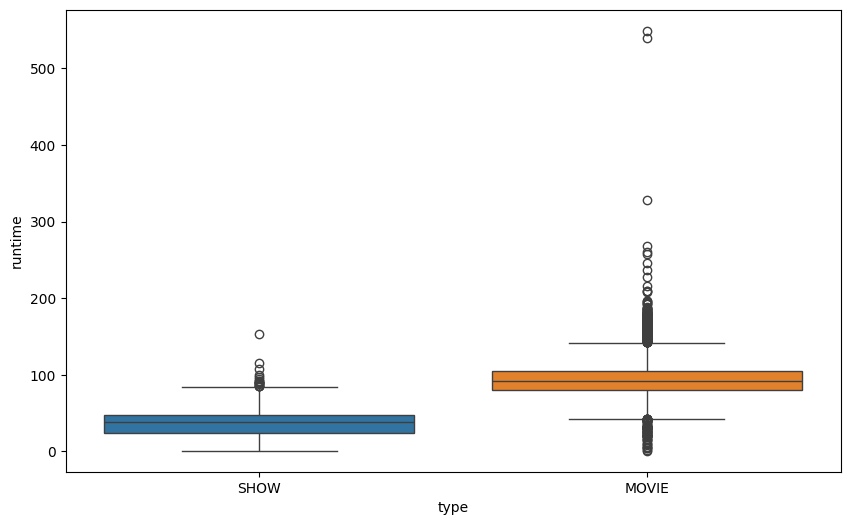

In [79]:
# Visulaizing Outliers for movies and shows.
plt.figure(figsize = (10,6))
sns.boxplot(title,x = 'type',y = 'runtime',hue = 'type')

- We can see here that there are some outliers that needs to be removed/treated, particularly those that have significantly less runtime. We can see this type of outlier in movies.
- For outliers with significantly high runtime, we should allow it in data, since some movies/shows that are documentries or experimental films tends to be of higher runtime.

In [80]:
df_movies = title[title['type'] == 'MOVIE']
df_show = title[title['type'] == 'SHOW']

In [81]:
# Code for calculating percentage lower bound outliers.
Q1 = df_movies['runtime'].quantile(0.25)
Q3 = df_movies['runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - (1.5 * IQR)
pct_outliers = round((len(df_movies[df_movies['runtime'] < lower_fence])/len(df_movies))*100,2)
outliers = df_movies[df_movies['runtime'] < lower_fence]
print(f"lower fence for movie {lower_fence}")
print(f"% lower outliers for movie is {pct_outliers}%")

lower fence for movie 42.5
% lower outliers for movie is 0.95%


We have outliers less than 1% that is about 0.95% of whole dataset. We can safely remove it.

In [82]:
# Code for removing outliers.
df_movies = df_movies.drop(outliers.index)

In [83]:
# cocatenate back the dataframes
df_new = pd.concat([df_show,df_movies],axis = 0)

In [84]:
# Converting 'genres' and 'production_countries' column from string to list like structures.
df_new['genres'] = df_new['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else [])
df_new['production_countries'] = df_new['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else [])

In [85]:
# Rechecking the dataset info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8874 entries, 0 to 9865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8874 non-null   object 
 1   title                 8874 non-null   object 
 2   type                  8874 non-null   object 
 3   description           8874 non-null   object 
 4   release_year          8874 non-null   int64  
 5   runtime               8874 non-null   int64  
 6   genres                8874 non-null   object 
 7   production_countries  8874 non-null   object 
 8   imdb_id               8874 non-null   object 
 9   imdb_score            8874 non-null   float64
 10  imdb_votes            8874 non-null   float64
 11  tmdb_popularity       8874 non-null   float64
 12  tmdb_score            8874 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 970.6+ KB


Now we will create an exploded dataframe based on columns 'genres' and 'production_countriy' for better analysis.

In [86]:
df_exploded_genre = df_new.explode('genres') # Exploded dataset based on 'genres'
df_exploded_country = df_new.explode('production_countries') # Exploded dataset based on 'production_countries'

### What all manipulations have you done and insights you found?

- Some data in runtime column had very less runtime (min) indicating they were short videos.
- After treating and removing missing values and outliers in the dataset, we are left with 8874 rows with 12 columns.
- We still have 'genres' and 'production_countries' column data as list like structure, which we have exploded it one by one in two datsets for better analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

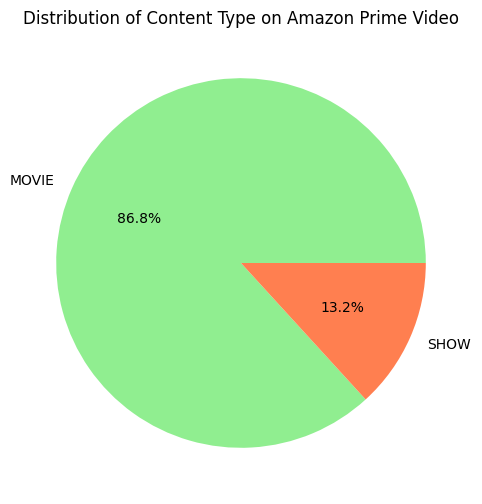

In [87]:
# Chart - 1 visualization code
df_temp = df_new.groupby('type').size().reset_index(name = 'count')
plt.figure(figsize = (8,6))
plt.title("Distribution of Content Type on Amazon Prime Video")
plt.pie(df_temp['count'],labels = df_temp['type'],autopct='%1.1f%%',colors=['lightgreen','coral'])
plt.show()

##### 1. Why did you pick the specific chart?

This Pie chart shows the percentage distribution of categories across the plateform.

##### 2. What is/are the insight(s) found from the chart?

- Amazon Prime Video streaming plateform is dominated by Movies (87%)
- Contribution of Shows is about 13%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movies is more dominated in this plateform, making it ideal for releasing/licensing new movies.

#### Chart - 2

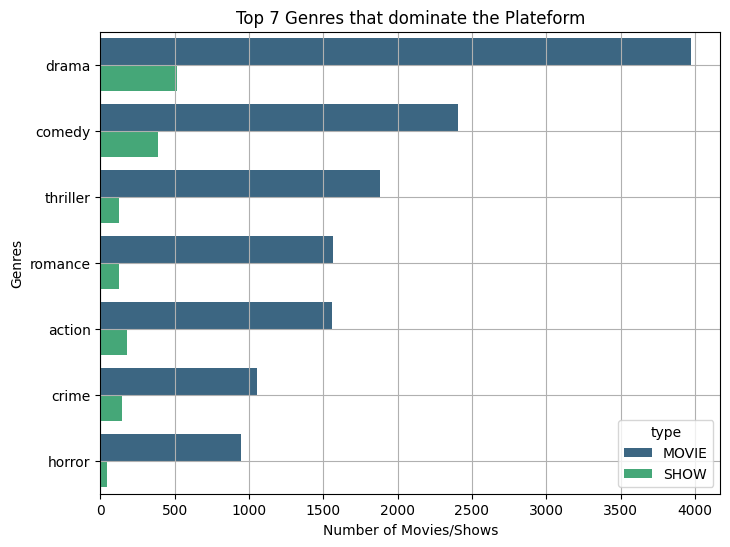

In [88]:
# Chart - 1 visualization code
plt.figure(figsize = (8,6))
plt.title("Top 7 Genres that dominate the Plateform")
df_temp = df_exploded_genre.groupby(['type','genres']).size().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
sns.barplot(df_temp,y = 'genres',x = 'count',hue = 'type',palette = 'viridis',order = df_temp['genres'].value_counts().index[:7])
plt.grid()
plt.xlabel("Number of Movies/Shows")
plt.ylabel("Genres")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the dominance of genre type on the plateform

##### 2. What is/are the insight(s) found from the chart?

- For Movies, Genre type drama is most preffered followed by comedy, thriller, romance, action and so on.
- Fo Shows, Although less compared to movies, genre type drama is most preffered followed by comedy, action crime and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since drame is most preffered for both content type, investing and licensing on dramatical contents may increase user engagement.

#### Chart - 3

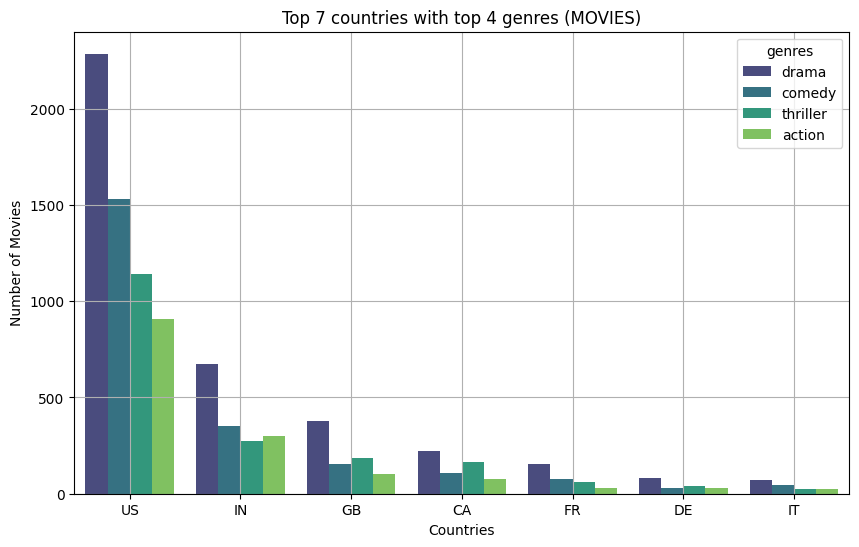

In [89]:
# Chart - 3 visualization code
df_temp_exploded = df_exploded_genre.explode('production_countries')
df_temp = df_temp_exploded[df_temp_exploded['type'] == 'MOVIE']
df_temp = df_temp.groupby(['genres','production_countries']).size().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
top_genres = df_temp['genres'].value_counts().index[:4]
df_filtered = df_temp[df_temp['genres'].isin(top_genres)]
top_countries = df_filtered['production_countries'].value_counts().index[:7]
plt.figure(figsize = (10,6))
plt.title("Top 7 countries with top 4 genres (MOVIES)")
sns.barplot(df_filtered,y = 'count',x = 'production_countries',hue = 'genres',order = top_countries,palette = 'viridis')
plt.grid()
plt.ylabel("Number of Movies")
plt.xlabel("Countries")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the top Genres for Movies in top 7 countries.

##### 2. What is/are the insight(s) found from the chart?

- In all the Top 7 countries 'drama' is most preffered, followed by comedy.
- In India 'action' movies are more preffered than thriller. Although here also drama is most preffered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Movies with the combination of 'drama','comedy','thriller' and 'action' are most released/licensed in US, India, United Kingdom(Great Britain), Canada, France and so on.
- Licensing more movies from other Countries such as India, Great Britain, etc can positively impact bussiness.

#### Chart - 4

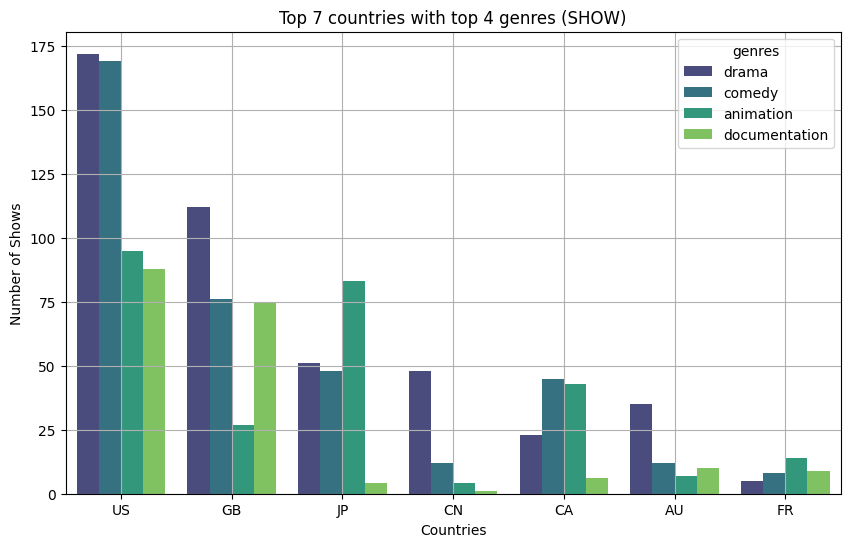

In [90]:
# Chart - 4 visualization code
df_temp = df_temp_exploded[df_temp_exploded['type'] == 'SHOW']
df_temp = df_temp.groupby(['genres','production_countries']).size().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
top_genres = df_temp['genres'].value_counts().index[:4]
df_filtered = df_temp[df_temp['genres'].isin(top_genres)]
top_countries = df_filtered['production_countries'].value_counts().index[:7]
plt.figure(figsize = (10,6))
plt.title("Top 7 countries with top 4 genres (SHOW)")
sns.barplot(df_filtered,y = 'count',x = 'production_countries',hue = 'genres',order = top_countries,palette = 'viridis')
plt.grid()
plt.ylabel("Number of Shows")
plt.xlabel("Countries")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the top Genres for Shows in top 7 countries.

##### 2. What is/are the insight(s) found from the chart?

- Shows in US are released generally with combination of drama and comedy.
- Shows in United Kingdom (Great Britain) are relaesed generally with combination of drama,comedy and documentries.
- Shows in Japan are mostly animation based with drama and comedy.
- Shows in China are drama based.
- Shows in Canada are mostly based on comedy and animation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Some insights can help creating a positive bussiness impact such as
- Investing/Licensing on shows of particular genre for a particular country could positively impact the bussiness.
- Targeting countries for respective genre could also positively impact company growth.

#### Chart - 5

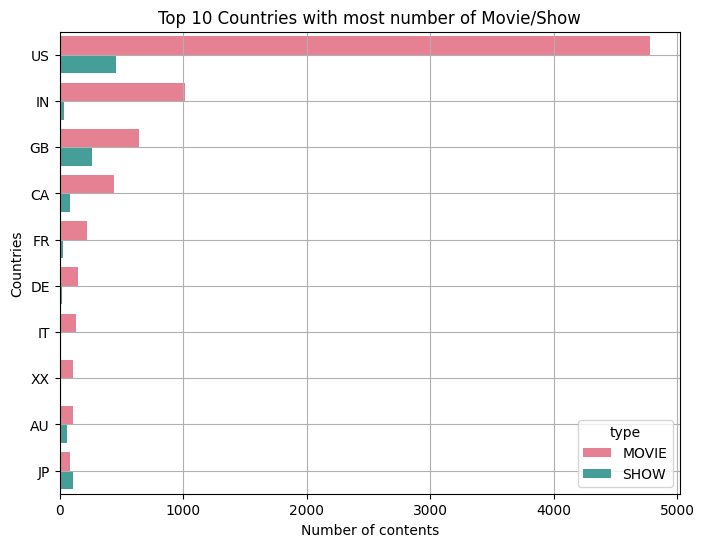

In [91]:
# Chart - 2 visualization code
df_temp = df_exploded_country.groupby(['type','production_countries']).size().reset_index(name = 'count').sort_values(by = 'count',ascending=False)
plt.figure(figsize=(8,6))
plt.title("Top 10 Countries with most number of Movie/Show")
sns.barplot(df_temp,y = 'production_countries', x = 'count',hue = 'type',palette = 'husl',
            order = df_temp['production_countries'].value_counts().index[:10])
plt.xlabel("Number of contents")
plt.ylabel("Countries")
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart shows the top 10 countries with most number of movie/show released.

##### 2. What is/are the insight(s) found from the chart?

- Top Producer for Movies are US,India, and United Kingdom (Great Britain) followed by Canada, France and Germany.
- Top Producer for Shows are US, Germany, and Japan

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Amazon Prime Video plateform should relaese/License more shows targeting those regions where movies to show ratio are very high particularly in India and Canada. People fond of watching movies will also be fond of series/shows.
- Investing/Licensing overall in Shows could potentially benefit the plateform by engaging more users.

#### Chart - 6

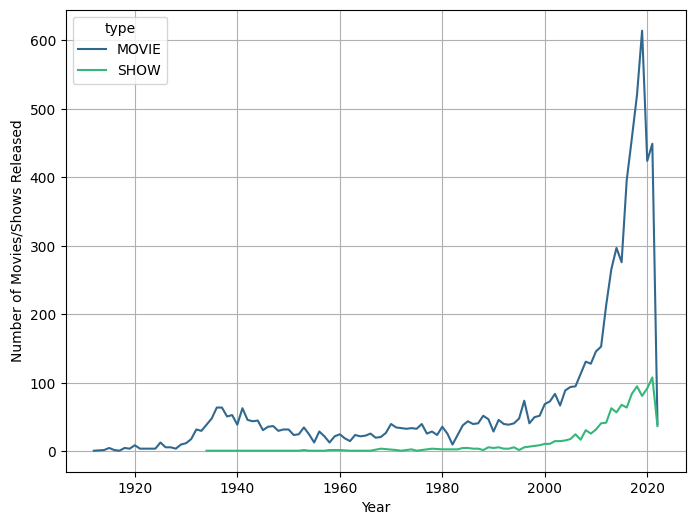

In [92]:
# Chart - 3 visualization code
df_temp = df_new.groupby(['type','release_year']).size().reset_index(name = 'count')
plt.figure(figsize = (8,6))
sns.lineplot(df_temp,x = 'release_year',y = 'count',hue = 'type',palette = 'viridis')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Number of Movies/Shows Released")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the distribution of content based on year it was released.

##### 2. What is/are the insight(s) found from the chart?

- From the chart we found that, most of the movies or shows on the plateform are released during the period from 2015 to 2020.
- Although there are some spikes in movies from release year 1930 to 1940, Indicating that there may be some movies that were superhit that time.
- A sharp decline around 2020 is indicating low movies/show release during that year due to COVID-19 lockdown.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Licensing more movies/shows of period between 1930 to 1940 and targeting users of older ages could bring positive impact to bussiness.
- Targeted advertisements of movies/shows for both old age user groups and new age group based on release year could be beneficial for the bussiness and viewership.

#### Chart - 7

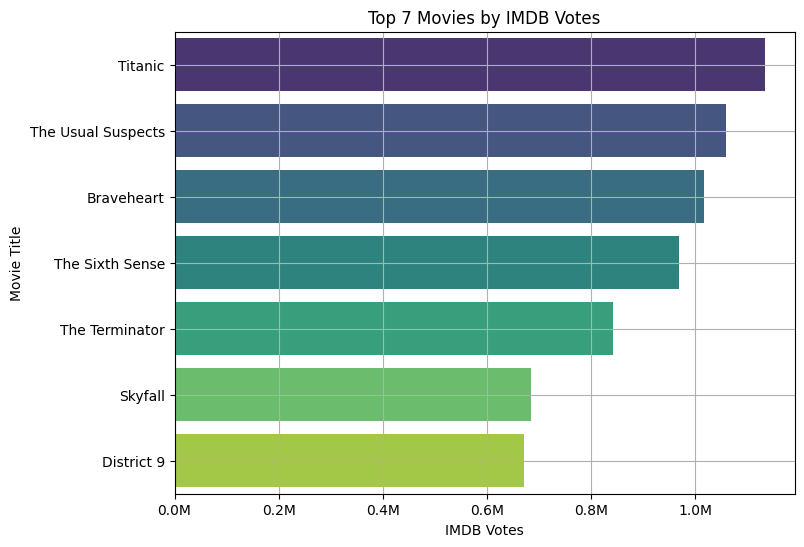

In [93]:
# Chart - 4 visualization code
df_movies = df_movies.sort_values(by = 'imdb_votes',ascending=False).head(7)
plt.figure(figsize = (8,6))
plt.title("Top 7 Movies by IMDB Votes")
sns.barplot(df_movies,x = 'imdb_votes',y = 'title',palette = 'viridis',
            hue = 'title',legend = False,order = df_movies['title'].value_counts().index[:7])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.grid()
plt.xlabel("IMDB Votes")
plt.ylabel("Movie Title")
plt.show()

##### 1. Why did you pick the specific chart?

This Horizontal bar chart shows Top 7 Movies by IMDb Votes.

##### 2. What is/are the insight(s) found from the chart?

Titanic is the highest voted movie with more than 1.5M, followed by 'The Usual Suspects', 'Braveheart' and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Movies like 'Titanic','The Usual Suspects','Braveheart','The Sixth Sense','The Terminator' has high user engagement or popularity. Amazon Prime could use this information to recommend similar type of movies to their users.
- Re-featuring these movies, could possibly reduce customer churn.

#### Chart - 8

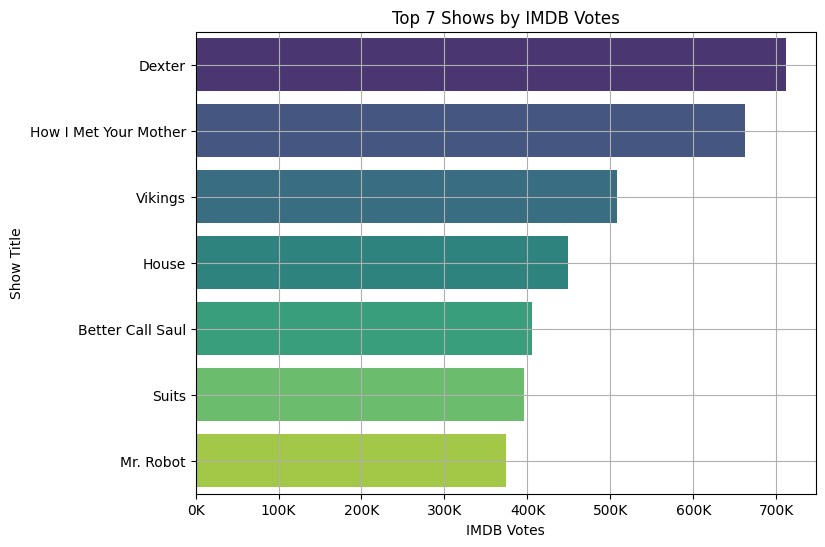

In [94]:
# Chart - 3 visualization code
df_show = df_show.sort_values(by = 'imdb_votes',ascending=False).head(7)
plt.figure(figsize = (8,6))
plt.title("Top 7 Shows by IMDB Votes")
sns.barplot(df_show,x = 'imdb_votes',y = 'title',palette = 'viridis',
            hue = 'title',legend = False,order = df_show['title'].value_counts().index[:7])
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000:.0f}K'))
plt.grid()
plt.xlabel("IMDB Votes")
plt.ylabel("Show Title")
plt.show()

##### 1. Why did you pick the specific chart?

This Horizontal bar chart shows Top 7 Shows by IMDb Votes.

##### 2. What is/are the insight(s) found from the chart?

Dexter is the highest voted show with more than 700K, followed by 'How I Met your Mother', 'Vikings' and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Shows like 'Dexter','How I Met Your Mother','Vikings','House' has high user engagement or popularity. Amazon Prime could use this information to recommend similar type of shows to their users.
- Re-featuring these shows, could possibly reduce customer churn.

#### Chart - 9

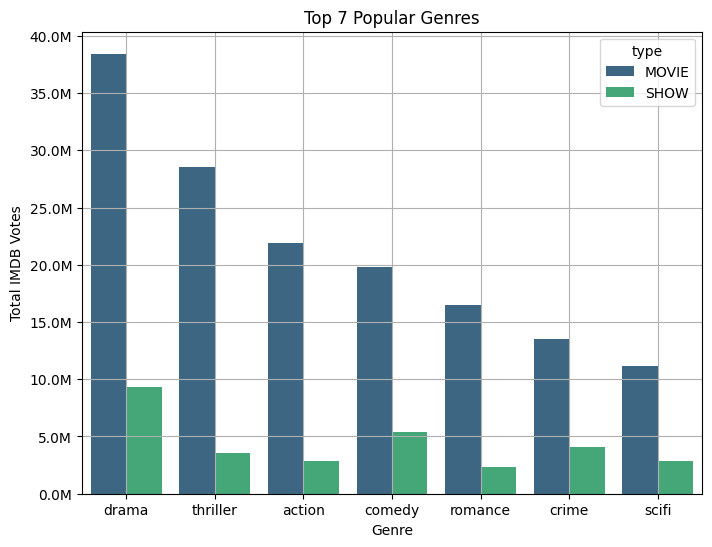

In [95]:
df_temp_show = df_exploded_genre.groupby(['type','genres'])['imdb_votes'].sum().reset_index(name = 'Sum_imdb_votes').sort_values(by = 'Sum_imdb_votes',
                                                                                                                     ascending = False)
plt.figure(figsize = (8,6))
plt.title("Top 7 Popular Genres")
sns.barplot(df_temp_show,x = 'genres',y = 'Sum_imdb_votes',order = df_temp_show['genres'].value_counts().index[:7],hue = 'type',palette = 'viridis')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))
plt.grid()
plt.xlabel("Genre")
plt.ylabel("Total IMDB Votes")
plt.show()

##### 1. Why did you pick the specific chart?

This bar graph shows the Top 7 most popular genres for both Movies And Shows.

##### 2. What is/are the insight(s) found from the chart?

- Movies with genres drama,thriller,action,comedy and romance are most popular.
- Shows with genres drama,comedy,crime and scifi are most popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The gained insights can be used by recommendation engine to recommend similar movies to targeted users both for movies and shows.
- Licensing more movies/shows based on popular genres by the streaming plateform could boost viewership and user retention.

# **Conclusion**

From the Exploratory Data Analysis of the Amazon Prime Video Dataset, we can now address our problem statement.
1. Genres and Categories that dominate the Plateform.
- The Plateform is dominated mostly by MOVIE (86.8%) with SHOW being 13.2%.
- The popular genres for movies is Drama, Comedy, Thriller, and Romance
- The popular genre for shows is Drama,Comedy,Action and Crime.

2. Variation of content distribution across different region.
- For movies most content are released in US, India, United Kingdom(Great Britain), Canada with popular genres as Drama, Comedy, Thriller, and Action.
- For Shows most content are from US,Great Britain, Japan, China, Canada, and Australia with popular popular genre like Drama, Comedy, Animation, and Documentation. Most show genre for US are Drama and Comedy, for GB are Drama, Comedy and Documentation, and for Japan it is mostly animation.

3. Evolution of content library with time.
- Most Shows and Movies on plateform are released in the year between 2015 to 2020.
- There is a sharp decline somewhere around 2020, probably due to COVID-19 Lockdown.

4. Highest rated Movies/Shows.
- 'Titanic','The Usual Suspects','Braveheart','The Sixth Sense','The Terminator' has high user engagement and are most popular movies.
- 'Dexter','How I Met Your Mother','Vikings' are most popular shows on plateform.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***